# Counting Words

This Notebook introduces some basic concepts in Python. At the end, users will be able to use their knowledge to count and plot words.

### Python Basics

When performing textual analysis we often work with sentences, like the one below.

In [1]:
jane_austen_quote = 'It is a truth universally acknowledged that a single man in possession of a good fortune must be in want of a wife'

`sentence` is a dummy variable that contains our quote from Jane Austen. We needed to assign the quote to a variable (e.g. `sentence`) in order to start doing things to it with code. For example, I can add an exclamation point to the end of `sentence` like so:

In [2]:
print(jane_austen_quote + '!')

It is a truth universally acknowledged that a single man in possession of a good fortune must be in want of a wife!


But what if I wanted to add an exclamation point after every word instead of at the end of the sentence? To do that I have to first "split" the sentence into words. 

In [3]:
word_list = jane_austen_quote.split()

print(word_list)

['It', 'is', 'a', 'truth', 'universally', 'acknowledged', 'that', 'a', 'single', 'man', 'in', 'possession', 'of', 'a', 'good', 'fortune', 'must', 'be', 'in', 'want', 'of', 'a', 'wife']


Now I can do things to each word of the sentence instead of just the full sentence. 

To add an exclamation point after every word I can access each word in the list and add `!` after it. 

But, wow, that's a lot of repetitive typing.

In [4]:
print(word_list[0] + '!')
print(word_list[1] + '!')
print(word_list[2] + '!')
print(word_list[3] + '!')
print(word_list[4] + '!')
print(word_list[5] + '!')
print(word_list[6] + '!')
print(word_list[7] + '!')
print(word_list[8] + '!')
print(word_list[9] + '!')
print(word_list[10] + '!')
print(word_list[11] + '!')
print(word_list[12] + '!')
print(word_list[13] + '!')
print(word_list[14] + '!')
print(word_list[15] + '!')

It!
is!
a!
truth!
universally!
acknowledged!
that!
a!
single!
man!
in!
possession!
of!
a!
good!
fortune!


. . . and you get the point.

Another way I could do this is with a for loop. You can read the syntax of the following for loop like this: "for every word in `word_list`, print the word with an added exclamation point." 

In [5]:
for word in word_list: # loop through each word in word list
    print(word + '!')  #  print the word with an !

It!
is!
a!
truth!
universally!
acknowledged!
that!
a!
single!
man!
in!
possession!
of!
a!
good!
fortune!
must!
be!
in!
want!
of!
a!
wife!


For our purposes it is not important to have a deep understanding of for loops. However, we did want to introduce them to you becuase you will see them again! (Like in this very Notebook.)

### Counting Words

Now that we understand how to work with sentences a little better, let's count words! We can use `.count()` to see how often words are mentioned.

In [6]:
word_list.count('a')

4

In [7]:
word_list.count('truth')

1

### Counting Words with "Counter"

`.count()` is useful if we want to see how often an individual word is stated in a text, but more often than not we want a word count for the entire document. 

One easy way to count all the words in a document is by using the `Counter()` command from the "collections" module. In the world of Python, a "module" is like an additional library that gives us more commands than what are typically provided by the base language. If you try to use `Counter()` without first loading the module, you will receive an error: `NameError: name 'Counter' is not defined`. 

In [8]:
from collections import Counter

In [9]:
word_count = Counter(word_list)

print(word_count)

Counter({'a': 4, 'in': 2, 'of': 2, 'It': 1, 'is': 1, 'truth': 1, 'universally': 1, 'acknowledged': 1, 'that': 1, 'single': 1, 'man': 1, 'possession': 1, 'good': 1, 'fortune': 1, 'must': 1, 'be': 1, 'want': 1, 'wife': 1})


We have to give `Counter()` a list of words or else we may not get the intended results. To see what I mean, let's try to use `Counter()` on the entire sentence instead of the word list.

In [11]:
quote_count = Counter(jane_austen_quote)

print(quote_count)

Counter({' ': 22, 'a': 9, 'n': 9, 't': 8, 's': 8, 'e': 8, 'o': 8, 'i': 7, 'u': 4, 'l': 4, 'f': 4, 'r': 3, 'w': 3, 'd': 3, 'g': 3, 'h': 2, 'm': 2, 'I': 1, 'v': 1, 'y': 1, 'c': 1, 'k': 1, 'p': 1, 'b': 1})


Whoops, that's a mess!

### Viewing Top Words

We can now use `.most_common()` on our word count to see the top words and their counts. 

In [25]:
word_count.most_common(10)

[('a', 4),
 ('in', 2),
 ('of', 2),
 ('It', 1),
 ('is', 1),
 ('truth', 1),
 ('universally', 1),
 ('acknowledged', 1),
 ('that', 1),
 ('single', 1)]

### Counting Words in an Old Bailey Trial

Now let's put our knowledge of words counts to the test! We are now going to count the words in an Old Bailey Trial from 1911. The following code "scrapes" the trial text from the web page's HTML so that we can the count words. 

You can put that put that URL in your browser to see which trial we are working with. You can also replace that URL with a different one, like an article from NPR (try: https://www.npr.org/2022/07/07/1110226702/boris-johnson-resignation-prime-minister-uk). 

In [12]:
from bs4 import BeautifulSoup
import requests

url = 'https://www.oldbaileyonline.org/browse.jsp?id=t19110228-43&div=t19110228-43'

source = requests.get(url) # get the data from the URL

page_content = BeautifulSoup(source.text, 'html.parser').find_all('p') # "parse" the data and find all text with paragraph anchors

text = [] # define an empty list
for paragraph in page_content: # do some additional cleaning. For each paragraph, "strip" the strings (i.e. get rid of anchors left over from the HTML)
    text.extend(paragraph.stripped_strings) # put each new, cleaned paragraph in our (once) empty list 

In [13]:
text[:10] # show just the first 10 items in text

["MORRISON, Stinie (29, baker), was indicted                                           for and charged on the Coroner's inquisition with the wilful murder of",
 'Leon Beron.',
 'Mr. Muir, Mr. Leycester, and Mr. Oddie prosecuted; Mr. Abinger, Mr. Macgregor (and subsequently Mr. Roland Oliver) defended.',
 'Police-constable',
 'DAVID DAVIS',
 ', 545 W, proved plans.',
 'Police-constable',
 'JOSEPH MUMFORD',
 ', 863 W. At 8.10 a.m. on January 1 I was on duty on Clapham Common. Walking along the path that leads from the bandstand to Lavender Gardens I saw close to the path and lying amongst some bushes the body of a dead man. I just picked up his left hand and dropped it again. I sent for assistance, and other police officers and the divisional surgeon arrived.',
 'Cross-examined. I saw some footprints; I cannot say how many; I did not take an impression of them. There was a pool of blood at the side of the railings and a trail of blood from the railings across the path. The body had a gre

Now we can clean our scraped text by removing symbols (e.g. periods, parenthesis, commas, etc.) and returning the trial text as a list of words (remember, we need a list if we want to count words).

In [14]:
body_text = ''.join(text).lower() # join the text into one sentence and transform all words to lower case

remove = ['(', ')', '.', ',', ';', '\''] # make a list of items we wish to remove

for symbol in remove: # loop through every item 
    body_text = body_text.replace(symbol, '') # if that item is present in the text, replace it

old_bailey_word_list = body_text.split() # split the text so we get that list of words we need to use Counter()

In [15]:
print(old_bailey_word_list[:100])

['morrison', 'stinie', '29', 'baker', 'was', 'indicted', 'for', 'and', 'charged', 'on', 'the', 'coroners', 'inquisition', 'with', 'the', 'wilful', 'murder', 'ofleon', 'beronmr', 'muir', 'mr', 'leycester', 'and', 'mr', 'oddie', 'prosecuted', 'mr', 'abinger', 'mr', 'macgregor', 'and', 'subsequently', 'mr', 'roland', 'oliver', 'defendedpolice-constabledavid', 'davis', '545', 'w', 'proved', 'planspolice-constablejoseph', 'mumford', '863', 'w', 'at', '810', 'am', 'on', 'january', '1', 'i', 'was', 'on', 'duty', 'on', 'clapham', 'common', 'walking', 'along', 'the', 'path', 'that', 'leads', 'from', 'the', 'bandstand', 'to', 'lavender', 'gardens', 'i', 'saw', 'close', 'to', 'the', 'path', 'and', 'lying', 'amongst', 'some', 'bushes', 'the', 'body', 'of', 'a', 'dead', 'man', 'i', 'just', 'picked', 'up', 'his', 'left', 'hand', 'and', 'dropped', 'it', 'again', 'i', 'sent', 'for']


We can now use `Counter()` and find the top words in the trial.

In [16]:
trial_count = Counter(old_bailey_word_list)

trial_count.most_common(15)

[('the', 1957),
 ('i', 1883),
 ('to', 953),
 ('and', 831),
 ('a', 708),
 ('was', 700),
 ('of', 618),
 ('in', 600),
 ('he', 535),
 ('on', 528),
 ('not', 503),
 ('that', 499),
 ('it', 452),
 ('at', 412),
 ('have', 322)]

Well . . . that's not very interesting . . . our top words are just made up things like "the" or "and." And it's very possible that any document we count will return something similar.

Analysts who work with text-as-data have a term for words like these--they're called "stop words"--and for the sake of our resesarch, we can simply remove them. 

In [17]:
stop_words = ['the', 'i', 'to', 'was', 'of', 'in', 'me', 'about', 'and', 'a', 'on', 'not', 'that', 'at', 'it', 'have', 'had', 'my',
              'with', 'for', 'is', 'did', 'as', 'there', 'from', 'or', 'were', 'been', 'but', 'they', 'when', 'went', 'do', 'this', 'two',
              'would', 'we', 'saw', 'never', 'be', 'before', 'an', 'got', 'after', 'say', 'some', 'see', 'them', 'up', 'go', 'because',
              'seen', 'no', 'came', 'out', 'asked', 'took', 'cannot', 'what', 'you', 'could', 'if', 'by', 'which', 'told', 'any', 'has',
              'put', 'are', 'then', 'other', 'mr', 'made', 'should', 'into', 'where', 'used', 'said', 'last', 'think', 'said', 'left',
              'one', 'whether', 'gave', 'only', 'am', 'pm', 'very', 'come', 'all', 'between', 'statement', 'first', 'three', 'remember',
              'every', 'who', 'take', 'can', 'said', 'know', 'him', 'his', 'her', 'hers'
              ]

To remove stop words, let's go back to `old_bailey_word_list` and do some additional cleaning. 

This time we are going to remove any word that is also in `stop_words`. The following code can be read like this: "for every word in `old_bailey_word_list` if that word is not in `stop_words`, keep it! Otherwise, don't!"

In [18]:
clean_old_bailey_word_list = []

for word in old_bailey_word_list: # for every word in our word list
    if word not in stop_words: # if the word is not in stop words 
        clean_old_bailey_word_list.append(word) # keep it and add it to our new list (named "clean_old_bailey_word_list")

clean_trial_count = Counter(clean_old_bailey_word_list)

In [19]:
clean_trial_count.most_common(15)

[('he', 535),
 ('prisoner', 192),
 ('street', 136),
 ('time', 112),
 ('police', 108),
 ('january', 98),
 ('exhibit', 84),
 ('night', 83),
 ('man', 82),
 ('deceased', 78),
 ('road', 68),
 ('court', 64),
 ('december', 61),
 ('murder', 60),
 ('she', 59)]

This looks much better! If you want you can remove even more words by adding them to `stop_words`.

### Visualizing Our Results

Now let's visualize our top words. Visualization is an important step in analysis becuase it makes it helps us communicate our findings to others. In the following code we take our top 25 words and plot them on a bar chart. 

In [20]:
top_words = dict(clean_trial_count.most_common(25))

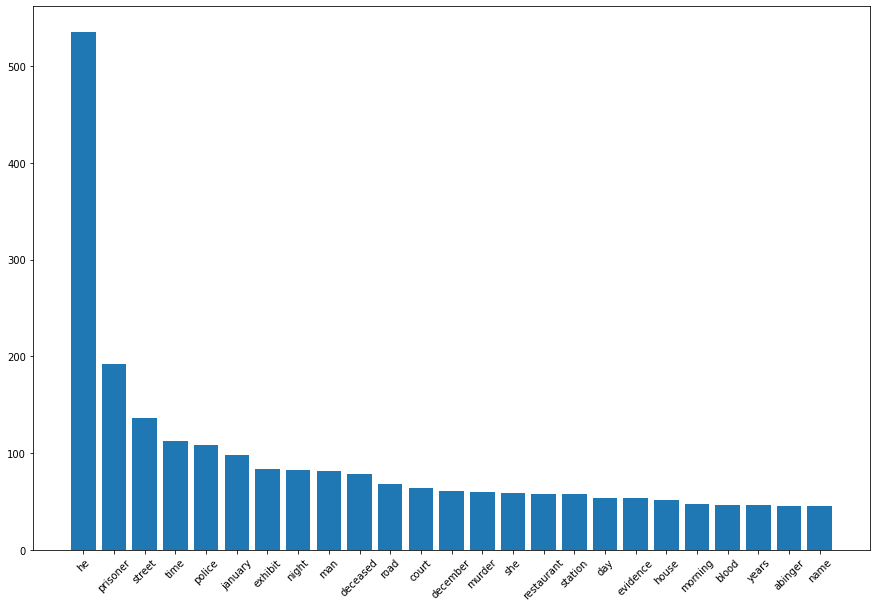

In [22]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 10]

plt.bar(range(len(top_words)), list(top_words.values()), align='center')
plt.xticks(range(len(top_words)), list(top_words.keys()))
plt.xticks(rotation = 45)
plt.show()

### Counting Words in the C19 Hansard Corpus

Now we are going to count words at a greater scale using the 19th-century British Parliamentary debates (also known as "Hansard"). We will count words from just the sentences containing the word "woman" from three decades: 1820, 1860, and 1880. We will then compare our decade counts ENTER.

To do this job effectively


we are going to need a few more tools in our Python toolbelt.

The next concept we introduce is the "function." We are going to use them a few times throughout this week.

### Defining Functions

A function is a re-usable code block. They allow us to work more efficiently. To see what I mean, 

Remember our Jane Austen quote from earlier? Let's split it into individual words using a function.

In [77]:
print(jane_austen_quote)

It is a truth universally acknowledged that a single man in possession of a good fortune must be in want of a wife


A function has a few extra pieces. First off, you must "define" the name of your function with `def` followed by whatever you wish to call it. I am going to call our function `string_splitter`. 

You must also define which data you wish to return.

In [36]:
def string_splitter(input_data): # "string_splitter" splits our sentence into individual words and transforms the words to lower case
    added_punctuation  = input_data + '!'
    lower_case_words = added_punctuation.lower()
    word_list = lower_case_words.split()
    return word_list

In [37]:
jane_austen_word_list = string_splitter(jane_austen_quote)

print(jane_austen_word_list)

['it', 'is', 'a', 'truth', 'universally', 'acknowledged', 'that', 'a', 'single', 'man', 'in', 'possession', 'of', 'a', 'good', 'fortune', 'must', 'be', 'in', 'want', 'of', 'a', 'wife!']


Now we can reuse the code from `string_splitter()` without all the rewriting.

In [39]:
charles_dickens_quote = 'It was the best of times, it was the worst of times'

charles_dickens_quote = string_splitter(charles_dickens_quote)

print(charles_dickens_quote)

['it', 'was', 'the', 'best', 'of', 'times,', 'it', 'was', 'the', 'worst', 'of', 'times!']


We've actually already used functions that someone else made for us. Remember `Counter()`?

In [40]:
charles_dickens_count = Counter(charles_dickens_quote)

print(charles_dickens_count)

Counter({'it': 2, 'was': 2, 'the': 2, 'of': 2, 'best': 1, 'times,': 1, 'worst': 1, 'times!': 1})


Now we are ENTER


### Working with (Bigger) Historical Data

In [67]:
import csv 
import re

def make_1D_list(period_words):
    flat_list = []
    
    for list in period_words:
        for word in list:
            flat_list.append(word)
                
    return flat_list


def data_import(dir_path, fname):
    with open(dir_path + fname, newline = '') as f: # read in the data. It will be imported as a list-of-lists 
        reader = csv.reader(f)
        data = list(reader)[1:]
        data = list(map(str, data))
            
    data = [re.sub(r'\b[A-Z]+(?:\s+[A-Z]+)*\b', '', ls) for ls in data] # remove words that are all upper case - so names 
    data = [re.sub(r'\\\\n|\\\\t|\'s', '', ls) for ls in data] # remove line breaks, tab breaks, and possessive "s"
    data = [re.sub(r'[^\w\s]|_', '', ls) for ls in data] # remove punctuation and underscore
    data = [re.sub(r'\d{1, 3}', '', ls) for ls in data] # remove digits that are a minimum of 1 and a maximum of 3
    data = [re.sub(r'\w*\d\w*', '', ls) for ls in data] # remove character strings that contain a digit
        
    data = [word.lower() for word in data]
    data = [ls.split() for ls in data]

    data = make_1D_list(data)

    return data

In [80]:
working_dir = '/home/stephbuon/data/'

In [49]:
hansard_1860 = data_import(working_dir, 'hansard_woman_1860.csv')

print(hansard_1860[:100])

['expressed', 'his', 'great', 'satisfaction', 'at', 'the', 'prospect', 'of', 'the', 'ladies', 'of', 'england', 'expressing', 'their', 'opinions', 'on', 'this', 'subject', 'for', 'it', 'really', 'was', 'a', 'woman', 'question', 'poor', 'old', 'cripple', 'he', 'informed', 'me', 'had', 'been', 'charged', 'with', 'committing', 'a', 'rape', 'upon', 'a', 'strong', 'healthy', 'young', 'woman', 'the', 'offence', 'was', 'sworn', 'by', 'the', 'prosecutrix', 'to', 'have', 'been', 'committed', 'in', 'open', 'day', 'on', 'the', 'groundfloor', 'room', 'of', 'a', 'house', 'looking', 'upon', 'a', 'wellfrequented', 'street', 'and', 'in', 'which', 'there', 'were', 'several', 'other', 'persons', 'some', 'of', 'them', 'women', 'at', 'the', 'time', 'none', 'of', 'whom', 'heard', 'any', 'noise', 'screaming', 'or', 'struggling', 'that', 'learned', 'gentleman', 'entreated', 'the', 'house']


### Remove Stop Words

We are going to remove stop words three times as well. Instead of re-writing the code to remove stop words three times, we can just re-write the name of the function.

This code probably looks familiar becuase we already used it to remove stop words from the Old Bailey trial. Now we will define a function named `remove_stop_words()` so we can remove stop words without having to re-write the code every time! 

Takes to arguments: a flat list made up of our words from Hansard, and a flat list made up of our stop words. 

In [84]:
def remove_stop_words(flattened_list, stop_words):
    clean_hansard = []
    
    for word in flattened_list:
        if word not in stop_words:
            clean_hansard.append(word)
    return clean_hansard

In [85]:
clean_hansard_1860 = remove_stop_words(hansard_1860, stop_words)

hansard_1860_count = Counter(clean_hansard_1860)

Now we are going to do this two more times. 

In [53]:
hansard_1820 = data_import(working_dir, 'hansard_woman_1820.csv')
clean_hansard_1820 = remove_stop_words(hansard_1820, stop_words)
hansard_1820_count = Counter(clean_hansard_1820)

In [54]:
hansard_1880 = data_import(working_dir, 'hansard_woman_1880.csv')
clean_hansard_1880 = remove_stop_words(hansard_1880, stop_words)
hansard_1880_count = Counter(clean_hansard_1880)

Now we can see our most common words

In [58]:
hansard_1820_count.most_common(15)

[('woman', 411),
 ('he', 172),
 ('she', 121),
 ('man', 79),
 ('such', 61),
 ('case', 59),
 ('their', 45),
 ('so', 44),
 ('upon', 43),
 ('might', 39),
 ('queen', 39),
 ('against', 32),
 ('house', 32),
 ('another', 32),
 ('under', 30)]

In [59]:
hansard_1860_count.most_common(15)

[('woman', 740),
 ('he', 319),
 ('man', 214),
 ('she', 174),
 ('case', 89),
 ('husband', 89),
 ('child', 83),
 ('poor', 80),
 ('law', 80),
 ('might', 78),
 ('married', 76),
 ('young', 73),
 ('wife', 64),
 ('marriage', 62),
 ('old', 61)]

In [57]:
hansard_1880_count.most_common(15)

[('woman', 1859),
 ('he', 731),
 ('she', 454),
 ('man', 434),
 ('case', 275),
 ('under', 185),
 ('will', 185),
 ('house', 184),
 ('so', 167),
 ('such', 165),
 ('their', 159),
 ('child', 152),
 ('might', 146),
 ('girl', 144),
 ('police', 140)]

Would be more interesting if we removed stop words. I've started -- why don't you do the rest?

In [51]:
stop_words = stop_words + ['might', 'bill', 'such', 'so']

print(stop_words)

['the', 'i', 'to', 'was', 'of', 'in', 'me', 'about', 'and', 'a', 'on', 'not', 'that', 'at', 'it', 'have', 'had', 'my', 'with', 'for', 'is', 'did', 'as', 'there', 'from', 'or', 'were', 'been', 'but', 'they', 'when', 'went', 'do', 'this', 'two', 'would', 'we', 'saw', 'never', 'be', 'before', 'an', 'got', 'after', 'say', 'some', 'see', 'them', 'up', 'go', 'because', 'seen', 'no', 'came', 'out', 'asked', 'took', 'cannot', 'what', 'you', 'could', 'if', 'by', 'which', 'told', 'any', 'has', 'put', 'are', 'then', 'other', 'mr', 'made', 'should', 'into', 'where', 'used', 'said', 'last', 'think', 'said', 'left', 'one', 'whether', 'gave', 'only', 'am', 'pm', 'very', 'come', 'all', 'between', 'statement', 'first', 'three', 'remember', 'every', 'who', 'take', 'can', 'said', 'know', 'him', 'his', 'her', 'hers', 'might', 'bill', 'such', 'so', 'might', 'bill', 'such', 'so', 'might', 'bill', 'such', 'so', 'might', 'bill', 'such', 'so']


### Comparing the Top Words in 1820, 1860, and 1880

Following tis the code to visualize each data set -- sentences with the word "woman" from the decades 1820, 1860, and 1880. 

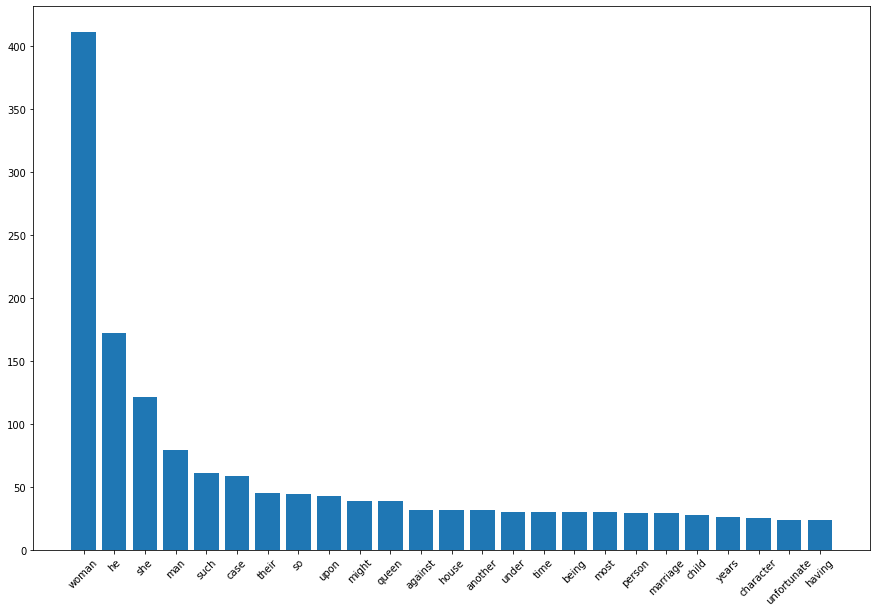

In [87]:
top_words_1820 = dict(hansard_1820_count.most_common(25))

plt.rcParams['figure.figsize'] = [15, 10]

plt.bar(range(len(top_words_1820)), list(top_words_1820.values()), align='center')
plt.xticks(range(len(top_words_1820)), list(top_words_1820.keys()))
plt.xticks(rotation = 45)
plt.show()

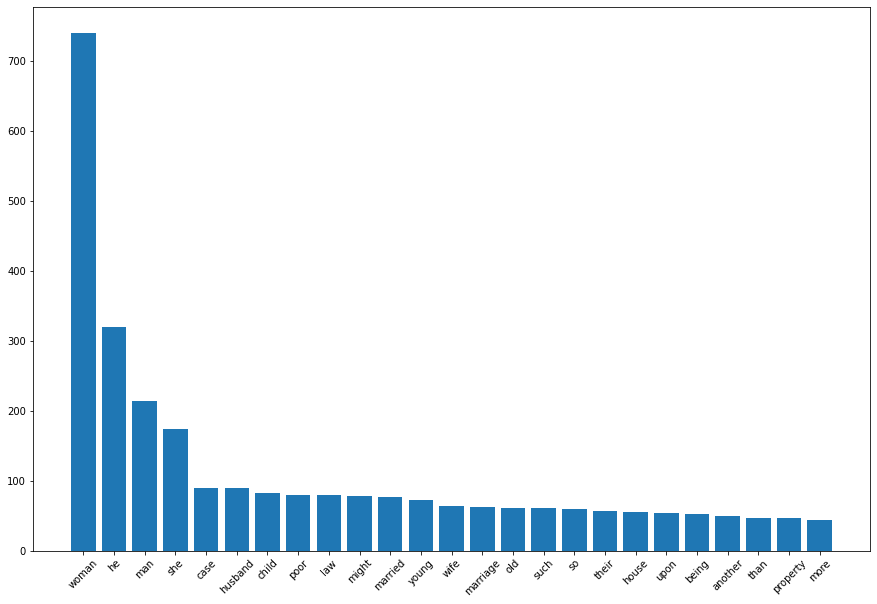

In [88]:
top_words_1860 = dict(hansard_1860_count.most_common(25))

plt.rcParams['figure.figsize'] = [15, 10]

plt.bar(range(len(top_words_1860)), list(top_words_1860.values()), align='center')
plt.xticks(range(len(top_words_1860)), list(top_words_1860.keys()))
plt.xticks(rotation = 45)
plt.show()

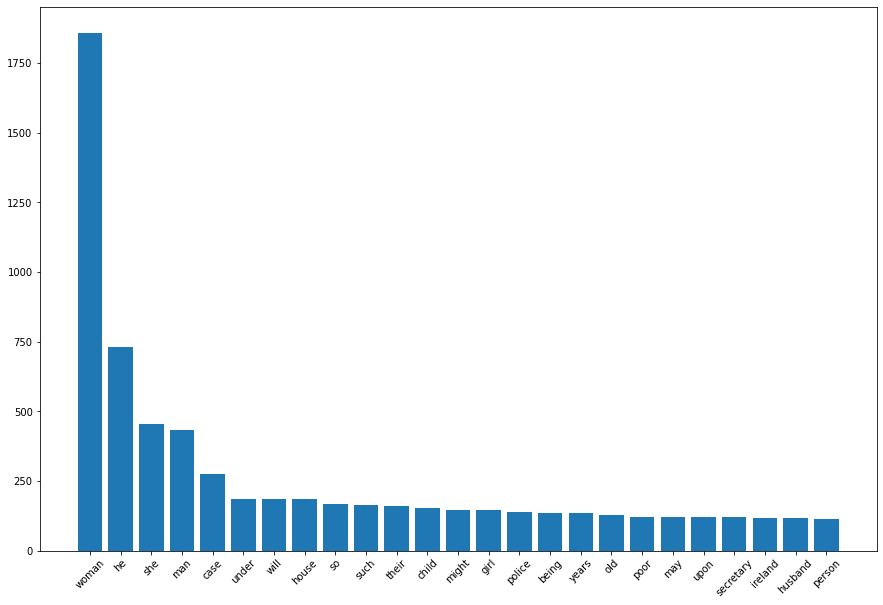

In [89]:
top_words_1880 = dict(hansard_1880_count.most_common(25))

plt.rcParams['figure.figsize'] = [15, 10]

plt.bar(range(len(top_words_1880)), list(top_words_1880.values()), align='center')
plt.xticks(range(len(top_words_1880)), list(top_words_1880.keys()))
plt.xticks(rotation = 45)
plt.show()